# Kaggle Titanic Competition - Exploratory Data Analysis (EDA)
- Problem Description: The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 
- Author: Kimberly Gaddie
- Date Last Updated: 17 May 2021

### Step 0 - Import Libraries

In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'
"notebook.output.textLineLimit": 500


### Step 1 - Import and Format Dataset for Exploration

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_full = pd.concat([df_train, df_test])

### Step 2 - Explore Basic Characteristics of Dataset

In [3]:
# Explore Dataset
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next step is to examine the dataset in its totality. By using the describe() function, the key statistics for all numeric data is displayed.

In [6]:
print(f'Total Records -- {len(df_full)}')
df_full.describe()

Total Records -- 1309


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


One aspect to consider is how many nulls are there across the entirety of the dataset.

Discussion on what Nulls may mean and different types of Nulls

In [7]:
# How many NULLS do we have?
df_full.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
dtype: int64

Any interesting Correlations? What do correlations mean and indicate?

<AxesSubplot:>

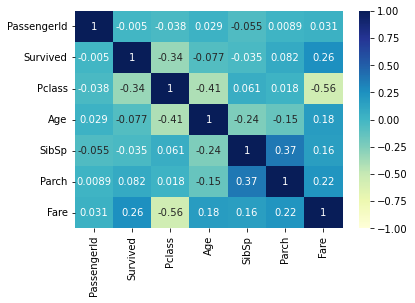

In [8]:
# Any interesting correlations?
cor = df_full.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True, vmax=1, vmin=-1)

We've summarized the numerical data so now let's look at the categorical data.

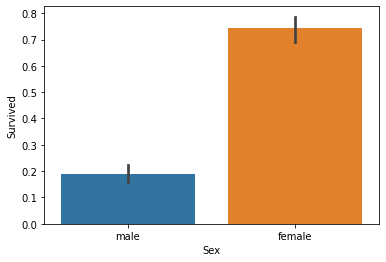

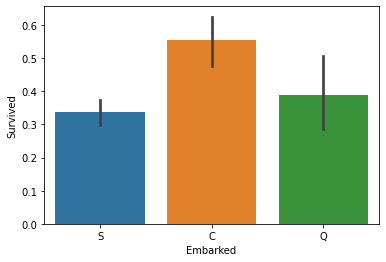

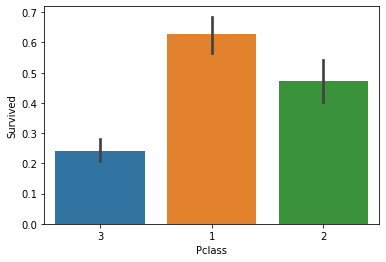

In [9]:
sns.barplot(x=df_full.Sex, y=df_full.Survived)
plt.show()

sns.barplot(x=df_full.Embarked, y=df_full.Survived)
plt.show()

sns.barplot(x=df_full.Pclass.astype('str'), y=df_full.Survived)
plt.show()

## Data Imputation and Cleaning of Data

From our previous EDA we've discovered that there's only a few components that are missing from our dataset
- Fare :: Only 1 Missing, simple replacement by Embarked, Class, & Cabin
- Age :: 263 missing
- Embarked :: Only 2 missing, same ticket, checked for bias for embarkment by cabin & class, 50|50 between S & C. Used majority for data set

Noticeably in the preview of the dataset we can see that there are null values in the cabin portion of the dataset. For cleaner viewing, one methodology is to fill the null values with a placeholder value. In this case, we will use X in place of the NaN values.

In [10]:
df_full['Cabin'].fillna("X", inplace=True)
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


##### Let's look into the Missing Fare Value

- Proxy for social economic status?
- Proxy for access to life rafts?

In [11]:
df_full[df_full['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,X,S


Noting that we do have some characteristics we can use to calculate a mean to replace the missing Fare value. In isolating all the records which have a similar embarkation location of "S", Passenger Class of "3" and a cabin of "X", an mean is calculated and then used to replace the missing Fare value for Mr. Thomas Storey.

In [12]:
#Printing what the mean value is calculatd to be
df_full['Fare'][(df_full['Embarked'] == 'S') & (df_full['Pclass'] == 3) & (df_full['Cabin'] == 'X')].mean()

14.515505186721997

In [15]:
#Replacing the missing value with the calculated mean
df_full['Fare'].loc[df_full['Fare'].isna()] = df_full['Fare'][(df_full['Embarked'] == 'S') & \
                                                              (df_full['Pclass'] == 3) & \
                                                              (df_full['Cabin'] == 'X')].mean()

##### Replacing the Missing Cabin Values
- Can we replace missing cabin id? -- All Cabins begin w/ letter, very few unique letters...
- What about missing cabin? -- Cabins are very stratified by class and cost. Could use KNN for imputation

In [17]:
#Creating a breakdown of Cabin by Passenger Class
df_full['New Cabin'] = df_full['Cabin'].apply(lambda x: x[0])
print(df_full.groupby(['New Cabin', 'Pclass'])['Fare'].agg(['mean', 'count']).sort_values(['Pclass', 'mean']))

                        mean  count
New Cabin Pclass                   
T         1        35.500000      1
A         1        41.244314     22
D         1        58.919065     40
E         1        63.464706     34
X         1        70.268157     67
C         1       107.926598     94
B         1       122.383078     65
E         2        11.587500      4
D         2        13.595833      6
X         2        21.394537    254
F         2        23.423077     13
          3         9.395837      8
E         3        11.000000      3
X         3        13.353202    693
G         3        14.205000      5


<AxesSubplot:xlabel='New Cabin', ylabel='Fare'>

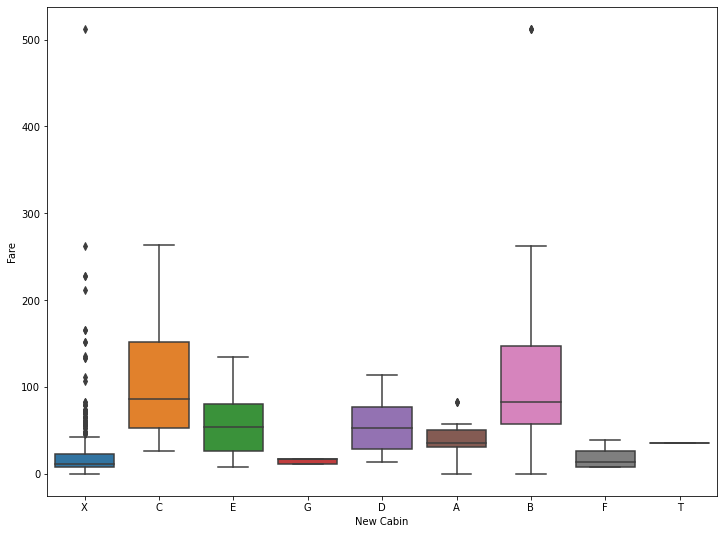

In [18]:
# Plotting the results in the form of boxplots
plt.figure(figsize=(12,9))
sns.boxplot(x=df_full['New Cabin'], y=df_full['Fare'])

Missing Cabins have been converted from nulls to "X" Class. One method to try and impute the missing values is via a classification model. For this example, we will try to use the KNN (K-Nearest Neighbors) Methodology to impute a replacement value for the missing cabin class.

In [ ]:
# set X aside right now
knn = df_full[['Pclass','Fare']][(df_full['New Cabin'] != 'X') & ~(df_full['Pclass'].isna()) & \
                                                                       ~(df_full['Fare'].isna())]

knn_lab = df_full['New Cabin'][(df_full['New Cabin'] != 'X') & ~(df_full['Pclass'].isna()) & \
                                                               ~(df_full['Fare'].isna())]

imp = df_full[['Pclass','Fare']][(df_full['New Cabin'] == 'X') & ~(df_full['Pclass'].isna()) & \
                                                                       ~(df_full['Fare'].isna())]

# All data for clustering needs to be scaled
# This prevents large value variables having precedence over low value variables 
scaler = StandardScaler()
scaler.fit(df_full[['Pclass','Fare']])
train = scaler.transform(knn[['Pclass','Fare']])
test = scaler.transform(imp)

k = 3
model = KNeighborsClassifier(n_neighbors = k)
model.fit(train, knn_lab)
new_labels = model.predict(test)

imp['knn_cabin'] = new_label

In [ ]:
df_full['New Cabin'].loc[(df_full['New Cabin'] == 'X') & ~(df_full['Pclass'].isna()) & \
                                                         ~(df_full['Fare'].isna())] = new_labels

df_full['New Cabin'].value_counts()

In [ ]:
sns.barplot(x=df_full['New Cabin'], y=df_full['Survived'])
plt.show()

##### Missing "Age" Values
- Age is problematic... 
- LOTS of missing. Straight replacement is sub-optimal. We could cheat and pull
    pull data from other known sources (open source databases, seems like a 
    cheat)...
- Imputation, unlike cabin has a lot of unknowns... Let's do straight
    replacement now and determine if we want to move forward with this 
    feature... (Straight imputation has MAPE ~10%)

One aspect which may help in determining age is the title included in all names listed for the passenger itinerary (Mr., Mrs., etc). Let's start by creating this feature in our dataset to potentially be used later as well. Some are not common, others very. Can we combine?


In [19]:
df_full['TitleF'] = df_full['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
df_full['TitleF'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: TitleF, dtype: int64

In [26]:
upper_class = ['Rev', 'Dr', 'Col', 'Major', 'Sir', 'Mme', 'Capt', 'Dona', 'the Countess', 'Don', 'Jonkheer', 'Lady']
f_sing = ['Ms', 'Mlle', 'Miss']

df_full['Title'] = np.nan
df_full['Title'].loc[df_full['TitleF'].isin(upper_class)] = 'Upper'
df_full['Title'].loc[df_full['TitleF'].isin(f_sing)] = 'Miss'
df_full['Title'].loc[df_full['Title'].isna()] = df_full['TitleF'].loc[df_full['Title'].isna()]

df_full = df_full.drop(columns=['TitleF'])
df_full['Title'].value_counts()

Mr        757
Miss      264
Mrs       197
Master     61
Upper      30
Name: Title, dtype: int64

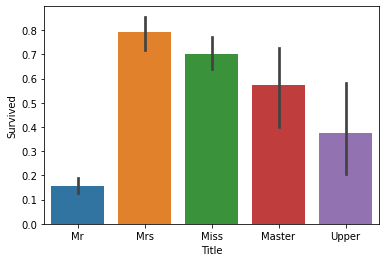

In [27]:
sns.barplot(x=df_full['Title'], y=df_full['Survived'])
plt.show()

Returning back to the missing age problem, let's first look at what the breakdowns are amongst the records which are missing age

In [28]:
missing_age = df_full[df_full['Age'].isna()]

print(missing_age['New Cabin'].value_counts())
print(missing_age['Pclass'].value_counts())

X    240
C      8
D      4
F      3
E      3
A      3
B      2
Name: New Cabin, dtype: int64
3    208
1     39
2     16
Name: Pclass, dtype: int64


In [29]:
print(missing_age['Sex'].value_counts())
print(missing_age['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip()).value_counts())

male      185
female     78
Name: Sex, dtype: int64
Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: Name, dtype: int64


In [30]:
print(missing_age['Parch'].value_counts())
print(missing_age['SibSp'].value_counts())

0    234
2     16
1     10
9      2
4      1
Name: Parch, dtype: int64
0    206
1     39
8      8
2      6
3      4
Name: SibSp, dtype: int64


Let's group age in the original dataset by Passenger Class and Title to calculate the median age for these groups

In [31]:
grouped_age = df_full.groupby(['Pclass','Title']).median()['Age']
print(grouped_age)

Pclass  Title 
1       Master     6.0
        Miss      30.0
        Mr        41.5
        Mrs       45.0
        Upper     48.0
2       Master     2.0
        Miss      20.0
        Mr        30.0
        Mrs       30.5
        Upper     41.5
3       Master     6.0
        Miss      18.0
        Mr        26.0
        Mrs       31.0
Name: Age, dtype: float64


In [32]:
# Fill missing age values in train and test data
df_full.set_index(['Pclass', 'Title'], drop=False, inplace=True)
df_full['Age'].fillna(grouped_age, inplace=True)
df_full.reset_index(drop=True, inplace=True)

In [33]:
#Validate that there are no longer any remaining null values
df_full['Age'].isna().sum()

0

##### Missing Embarked Data

In [34]:
record = df_full[df_full['Embarked'].isna()]
record

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New Cabin,Title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,Mrs


In [ ]:
pd.crosstab(df_full['Embarked'], df_full['New Cabin'])

In [ ]:
df_full['Embarked'].value_counts()

In [ ]:
df_full['Embarked'].loc[df_full['Embarked'].isna()] = 'S'